In [1]:
from tensorflow.keras.models import load_model
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, classification_report
import numpy as np

In [3]:
test = pd.read_csv("../Data/Test.csv")
model = load_model("../Models/Philippine_Employability.keras")
with open('../tools/power_transform.sav', 'rb') as file:
    scaler = pickle.load(file)

In [4]:
X = test.iloc[:,1:]
y = X.pop("CLASS")

X_test_scaled = scaler.transform(X)

In [6]:
pred = model.predict(X_test_scaled)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [7]:
roc_auc_score(y, pred)

0.9786096642578906

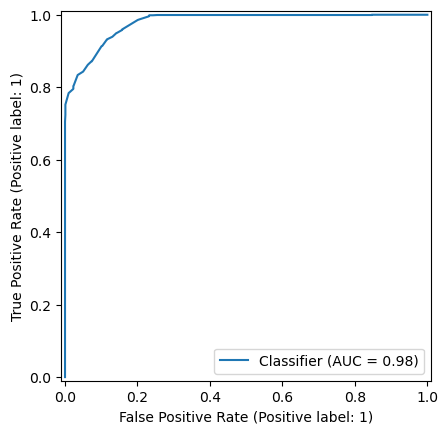

In [9]:
RocCurveDisplay.from_predictions(y, pred)

In [10]:
report = classification_report(y,np.round(pred), output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.925566,0.856287,0.889580,1002.000000
1,0.901235,0.950108,0.925026,1383.000000
accuracy,0.910692,0.910692,0.910692,0.910692
macro avg,0.913400,0.903198,0.907303,2385.000000
weighted avg,0.911457,0.910692,0.910134,2385.000000
